# Difference-in-difference (DID) Analysis:

is a popular approach used to estimate the causal effects of interventions by comparing changes in outcomes over time between treatment and control groups.
Difference-in-difference (DID) analysis is commonly used for numerical data in econometrics and quantitative research in the social sciences to estimate the effects of interventions or treatments by comparing changes in outcomes over time between treatment and control groups.

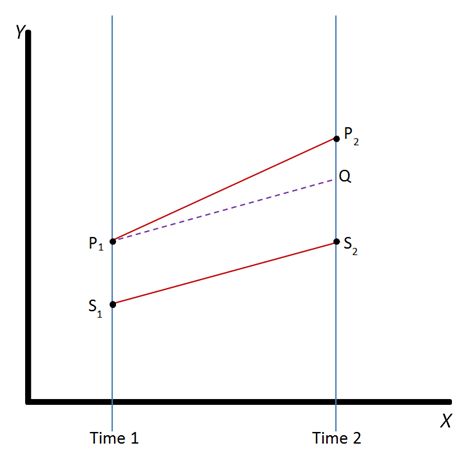

From the above picture we can understand that the difference betwwen P2 and Q is our treatment effect or whcih we are callling diffence in diffrence.

## Example:
Suppose, in the 5th standard class there are 4 sections. We decided to give extra care to sections A and B. And we want to compare the scores of the students before we started and after we started. And also between the sections where students are getting extra care compared to not getting any extra care. For this we are ccreating a dummy data.

In [5]:
# Set seed for reproducibility
set.seed(8)

# Create sections A, B, C, D
sections <- c("A", "B", "C", "D")

# Create years between 2020 and 2023
years <- sample(2020:2023, 30, replace = TRUE)

# Sample sections randomly
sampled_sections <- sample(sections, 30, replace = TRUE)

# Generate random scores between 70 and 90
scores <- sample(70:90, 30, replace = TRUE)

# Create data frame
data <- data.frame(Section = sampled_sections, Year = years, Score = scores)

# Print the resulting data frame
print(data)

   Section Year Score
1        B 2023    72
2        C 2023    77
3        B 2022    73
4        A 2021    88
5        B 2022    76
6        C 2023    90
7        C 2022    85
8        B 2021    90
9        A 2022    70
10       B 2021    73
11       A 2020    76
12       B 2020    72
13       D 2021    87
14       B 2022    71
15       A 2022    86
16       B 2021    71
17       C 2021    81
18       D 2023    88
19       B 2022    84
20       B 2023    81
21       A 2023    84
22       D 2021    71
23       D 2020    80
24       D 2020    89
25       D 2023    78
26       A 2021    85
27       B 2022    75
28       B 2023    85
29       D 2022    78
30       C 2022    89


Here we have sections, years and the scores of the students. We can say we start the intervention from 2021 and in sections A and B.

## Analysis:

Now its time for analysis. Before doing did we will do some extra work to create new variables. We will assign 1 to those years from and after the intervention start, here is 2021. And assign 1 to those sections which gets intervention as extra care.

In [6]:
data$time = ifelse(data$Year >= 2021, 1, 0)

data$treated = ifelse(data$Section == "A" |data$Section == "B", 1, 0)
head(data)

,Section,Year,Score,time,treated
,<chr>,<int>,<int>,<dbl>,<dbl>
1,B,2023,72,1,1
2,C,2023,77,1,0
3,B,2022,73,1,1
4,A,2021,88,1,1
5,B,2022,76,1,1
6,C,2023,90,1,0


Now we will create the interaction which we will call did.

In [7]:
data$did = data$time * data$treated
head(data)

,Section,Year,Score,time,treated,did
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,B,2023,72,1,1,1
2,C,2023,77,1,0,0
3,B,2022,73,1,1,1
4,A,2021,88,1,1,1
5,B,2022,76,1,1,1
6,C,2023,90,1,0,0


After this we can do regression for esrtimaste the effects of did.

In [8]:
didreg = lm(Score ~ treated + time + did, data = data)
summary(didreg)


Call:
lm(formula = Score ~ treated + time + did, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.400  -5.175   0.300   5.450  11.000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   84.500      4.684  18.040 3.19e-16 ***
treated      -10.500      6.624  -1.585    0.125    
time          -2.100      5.131  -0.409    0.686    
did            7.100      7.142   0.994    0.329    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.624 on 26 degrees of freedom
Multiple R-squared:  0.1397,	Adjusted R-squared:  0.04044 
F-statistic: 1.407 on 3 and 26 DF,  p-value: 0.263


We can aslo estimate the DID estimator (using the multiplication method, no
need to generate the interaction)

In [9]:
didreg = lm(Score ~ treated*time, data = data)
summary(didreg)


Call:
lm(formula = Score ~ treated * time, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.400  -5.175   0.300   5.450  11.000 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    84.500      4.684  18.040 3.19e-16 ***
treated       -10.500      6.624  -1.585    0.125    
time           -2.100      5.131  -0.409    0.686    
treated:time    7.100      7.142   0.994    0.329    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.624 on 26 degrees of freedom
Multiple R-squared:  0.1397,	Adjusted R-squared:  0.04044 
F-statistic: 1.407 on 3 and 26 DF,  p-value: 0.263


The coefficient for ‘DID’ is the differences-in-differences estimator which is 7.10 for (treated:time).
This suggests the scores of students increased more in the treatment group(Section A and B) compared to the control group (C and D) after the intervention( extra care started from 2021).
Since the p-value is 0.329 which is greater than 0.05, the effect is not significant at a 5% level of significance.
